#### Actividad: Actividad Deep Learning Fashion MNIST
#### Nombre: Luis Rodolfo Bojorquez Pineda
#### Matricula: A01250513

### Importamos las librerías necesarias.

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

### Cargamos la base de datos de Fashion MNIST.

In [42]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

### Normalizamos los datos

In [43]:
train_images, test_images = train_images/255.0, test_images/255.0

### Graficamos las primeras 25 imagenes del dataset

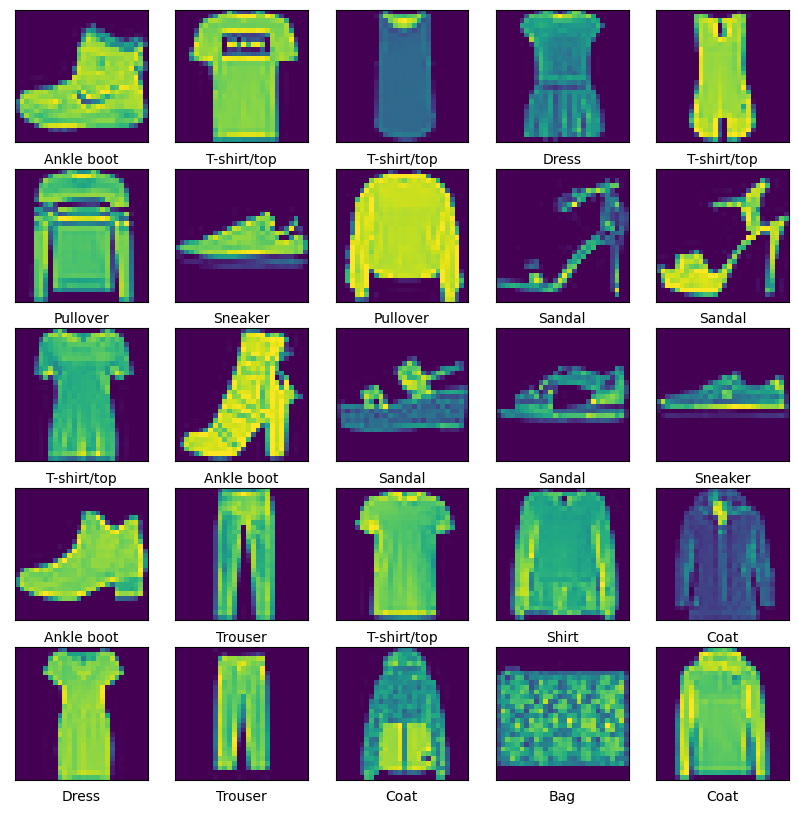

In [44]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()


### Capas de convolución

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

### Arquitectura de la red

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Generamos capas densas

In [56]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='softmax'))

### Volvemos a ver la arquitectura de la red

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

### Compilamos el modelo

In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### Entrenamos el modelo

In [58]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4942 - accuracy: 0.8219 - val_loss: 0.3819 - val_accuracy: 0.8643
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3170 - accuracy: 0.8841 - val_loss: 0.3002 - val_accuracy: 0.8930
Epoch 3/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2701 - accuracy: 0.9002 - val_loss: 0.2950 - val_accuracy: 0.8931
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2438 - accuracy: 0.9097 - val_loss: 0.2922 - val_accuracy: 0.8910
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2217 - accuracy: 0.9178 - val_loss: 0.2776 - val_accuracy: 0.9014
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1997 - accuracy: 0.9252 - val_loss: 0.2934 - val_accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1861 - accuracy: 0.9299 - val_loss: 0.2773 - val_a

### Evaluamos el modelo

313/313 - 1s - loss: 0.2889 - accuracy: 0.9138 - 1s/epoch - 3ms/step
0.9138000011444092


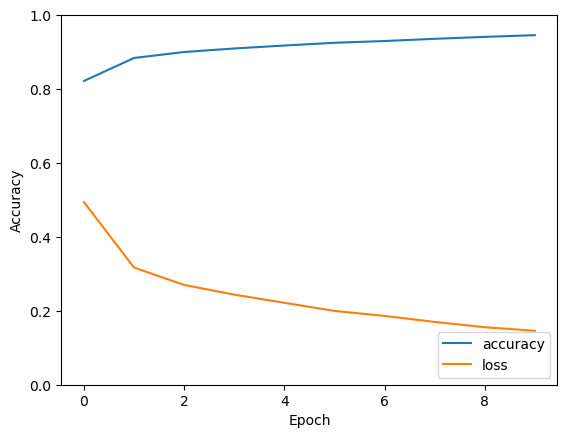

In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Imprimimos la precisión del modelo

In [60]:
print(test_acc)

0.9138000011444092


### Predecimos las etiquetas de las imágenes de prueba

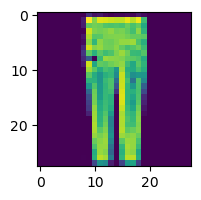

In [63]:
n = 200

plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.show()

In [62]:
predictions = model.predict(test_images)
print(predictions[n])

import numpy as np

print('La imagen pertenece al grupo {} con una probabilidad de {:2f} %'
      .format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

313/313 [==============================] - 1s 3ms/step
[1.08256249e-14 1.00000000e+00 4.61348963e-14 2.89043258e-13
 4.67073320e-13 3.87871270e-22 8.92447466e-14 1.04846815e-20
 1.11620246e-22 3.74975092e-23 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00